<a href="https://colab.research.google.com/github/Shreya168/AlgoMasters/blob/main/Analyzing_Social_Media_Trends_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Required Libraries
!pip install pandas matplotlib seaborn wordcloud

In [ ]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Step 1: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

Saving socialmediatrendsdataset.csv to socialmediatrendsdataset.csv


In [ ]:
# Replace 'sentimentdataset.csv' with the uploaded filename
df = pd.read_csv('socialmediatrendsdataset.csv')

In [ ]:
# Step 2: Data Cleaning
df_cleaned = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], errors='ignore')
df_cleaned['Hashtags'] = df_cleaned['Hashtags'].fillna('')
df_cleaned['Platform'] = df_cleaned['Platform'].fillna('Unknown')

In [ ]:
# Step 3: Analyze Popular Hashtags
# Create a list of all hashtags
hashtag_list = df_cleaned['Hashtags'].str.split().sum()
hashtag_freq = pd.Series(hashtag_list).value_counts().head(15)

<ipython-input-7-30c2e25a6cfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_freq.values, y=hashtag_freq.index, palette='coolwarm')


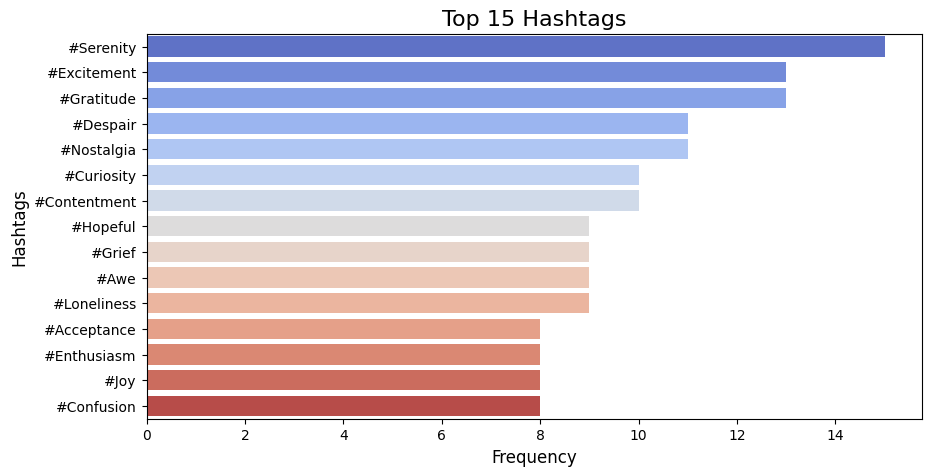

In [ ]:
# Plot the top 15 hashtags
plt.figure(figsize=(10, 5))
sns.barplot(x=hashtag_freq.values, y=hashtag_freq.index, palette='coolwarm')
plt.title('Top 15 Hashtags', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Hashtags', fontsize=12)
plt.show()

<ipython-input-8-ae580a9525a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Platform', palette='viridis')


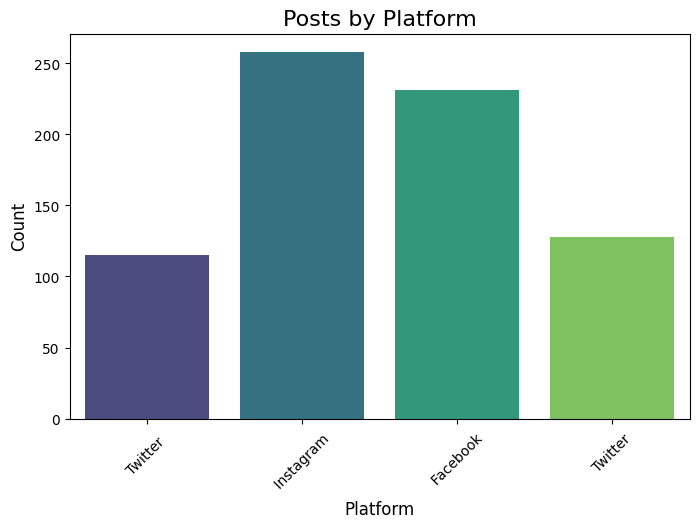

In [ ]:
# Step 4: Analyze Platform Trends
# Platform distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Platform', palette='viridis')
plt.title('Posts by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

<ipython-input-9-68db0ba0a4ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_liked['Likes'], y=top_liked['Text'], palette='mako')


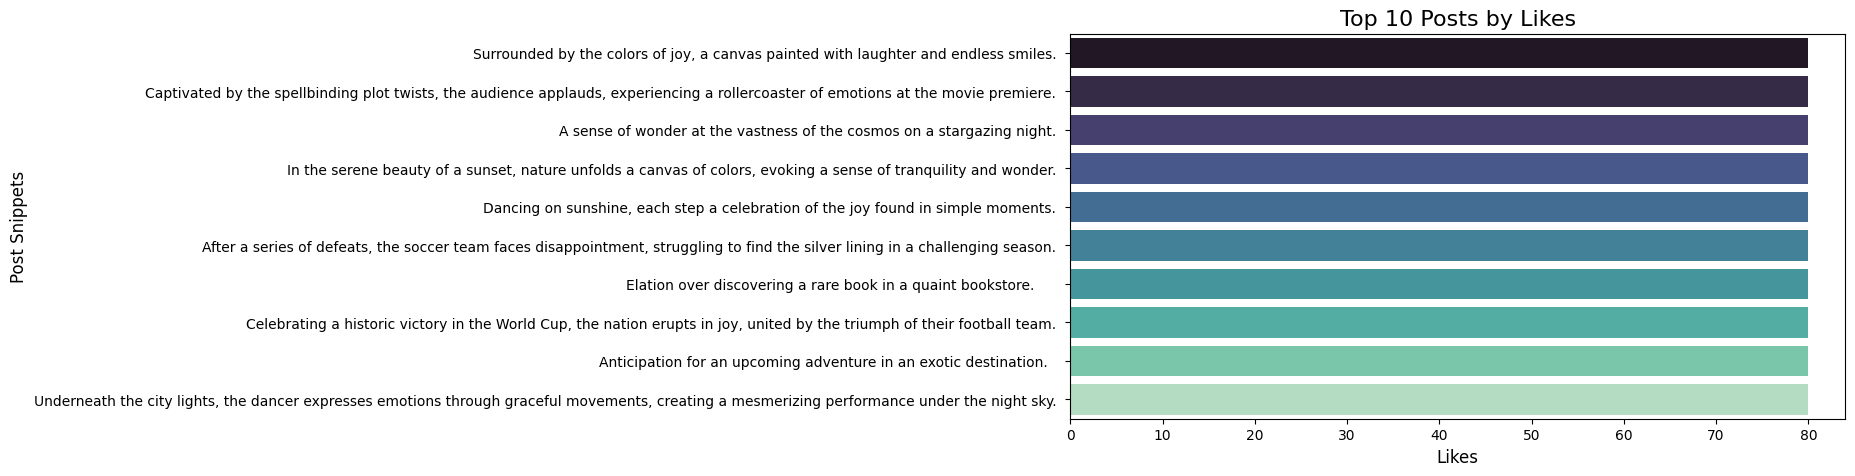

In [ ]:
# Step 5: Engagement Analysis
# Top posts with the most likes
top_liked = df_cleaned.sort_values(by='Likes', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_liked['Likes'], y=top_liked['Text'], palette='mako')
plt.title('Top 10 Posts by Likes', fontsize=16)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Post Snippets', fontsize=12)
plt.show()

<ipython-input-10-4e83672d2025>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_retweeted['Retweets'], y=top_retweeted['Text'], palette='rocket')


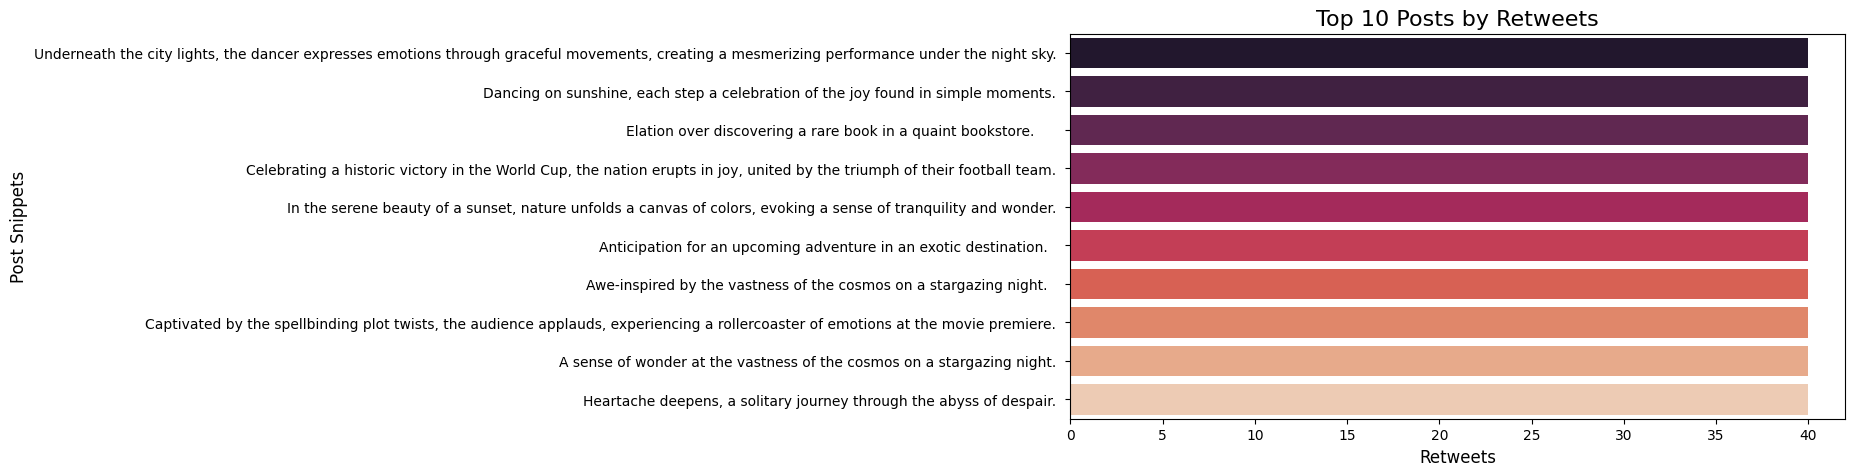

In [ ]:
# Top posts with the most retweets (if applicable)
if 'Retweets' in df_cleaned.columns:
    top_retweeted = df_cleaned.sort_values(by='Retweets', ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_retweeted['Retweets'], y=top_retweeted['Text'], palette='rocket')
    plt.title('Top 10 Posts by Retweets', fontsize=16)
    plt.xlabel('Retweets', fontsize=12)
    plt.ylabel('Post Snippets', fontsize=12)
    plt.show()

<ipython-input-12-7a5d42efc32b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Hour', palette='coolwarm')


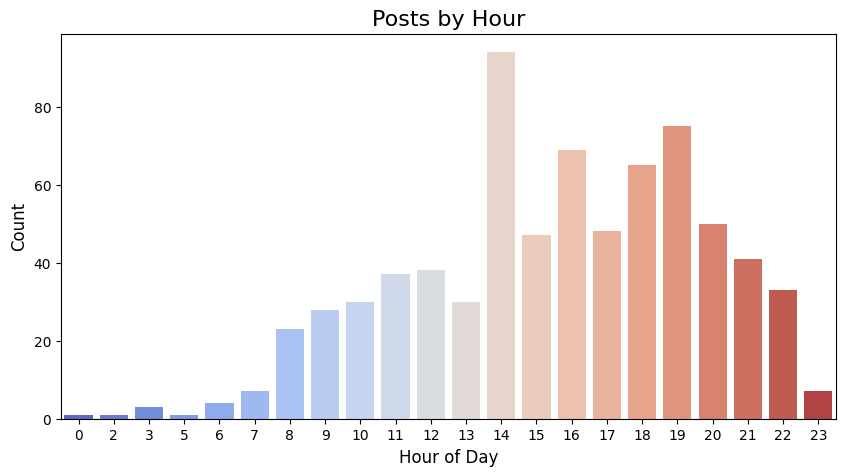

<ipython-input-12-7a5d42efc32b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Month', palette='pastel')


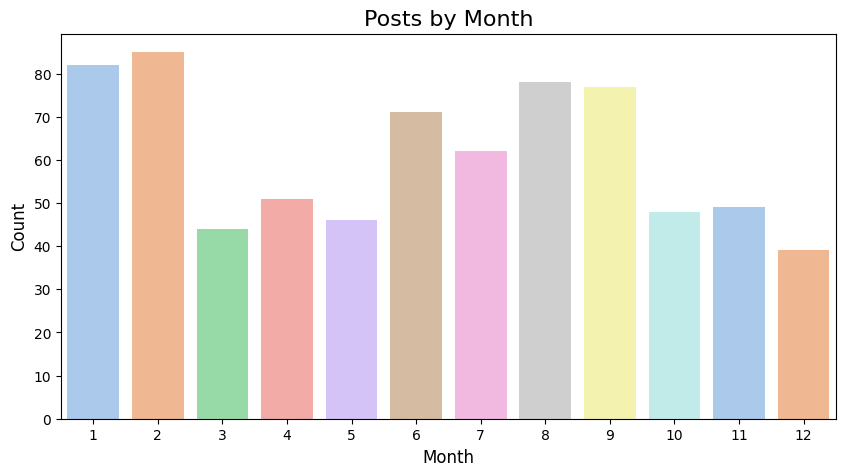

In [ ]:
# Step 6: Time-Based Trends (if timestamp data is available)
if 'Hour' in df_cleaned.columns:
    # Post frequency by hour
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x='Hour', palette='coolwarm')
    plt.title('Posts by Hour', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

if 'Month' in df_cleaned.columns:
    # Post frequency by month
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x='Month', palette='pastel')
    plt.title('Posts by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

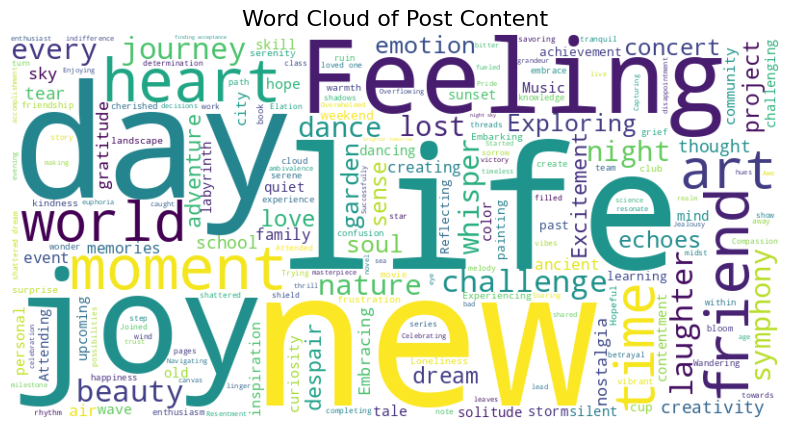

In [ ]:
# Step 7: Word Cloud of Post Content
text = ' '.join(df_cleaned['Text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Content', fontsize=16)
plt.show()

In [ ]:
# Step 8: Save Insights (Optional)
df_cleaned.to_csv('processed_social_media_trends.csv', index=False)
print("Processed dataset saved as 'processed_social_media_trends.csv'")

Processed dataset saved as 'processed_social_media_trends.csv'
